In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
from pylab import rcParams

In [2]:
url = "https://www.hubertiming.com/results/2023WyEasterLong"
html = urlopen(url)

soup = BeautifulSoup(html, 'lxml')
type(soup)

# get the title 
title = soup.title
print(title)

# print out the text
text = soup.get_text()
print(soup.text)

title = soup.title
print(title)

# Print out the text
text = soup.get_text()
print(soup.text)

<title>Race results for the 2023 Wy'Easter Skimo Race!</title>







Race results for the 2023 Wy'Easter Skimo Race!





















 2023 Wy'easter Skimo Long - Open
 Government Camp, Mt Hood, OR 
 March 26th, 2023


                            
 Snowgoat Skimo






 Email
                        timing@hubertiming.com with results questions. Please include your bib number if you have it.


                    






Huber Timing Home





Long - Open:


Finishers:
18


Male:
11


Female:
6


Non-Binary:
1







  Race Photos from Teresa Dalsager



 Vertical - Open
 Vertical - Heavy Mettle
 Long - Open
 Long - Heavy Mettle
 Long - Splitmo
 Recreation - Open
 Summary







Long - Open Results



Search:

Search
Division:

Men
Women
Non-Binary
Masters Men
Masters Women
Masters Non-Binary
F 25-29
F 35-39
F 40-44
M 25-29
M 30-34
M 35-39
M 40-44
M 45-49
M 55-59
O 30-34
 Filter




Place
Bib
Name
Gender
Age
City
State
Time
Gender Place
Age Group
Age Group Place




1
345


       

In [3]:
soup.find_all('a')

all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

rows = soup.find_all('tr')
print(rows[:10])

https://www.snowgoatskimo.com/
mailto:timing@hubertiming.com
https://www.hubertiming.com
https://photos.google.com/share/AF1QipOH1NdRAy6eTU48sA9TjVQm8TtfJdINxX2YFsfvrM0NvHZYi76cLSTJO-A0H87fcQ?key=UnMzVnlKUG9BZF9rdk1zS21EVVI5dlU5VVBhNmdB
https://www.teresadalsager.com/
/results/2023WyEaster
/results/2023WyEasterVertHM
/results/2023WyEasterLongHM
/results/2023WyEasterLongSplitmo
/results/2023WyEasterShort
/results/summary/2023WyEasterLong
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/
[<tr colspan="2">
<b>Long - Open:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>18</td>
</tr>, <tr>
<td>Male:</td>
<td>11</td>
</tr>, <tr>
<td>Female:</td>
<td>6</td>
</tr>, <tr>
<td>Non-Binary:</td>
<td>1</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>Age</th>
<th>City</th>
<th>State</th>
<th>Time</th>
<th>Gender Place</th>
<th>Age Group</th>
<th>Age Group Place</th>
</tr>, <tr data-bib="345">
<td>1</td>
<td>345</td>
<td>

              

In [4]:
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

[<td>18</td>, <td>338</td>, <td>

                    OLIVIA SPADOLA

                </td>, <td>F</td>, <td>27</td>, <td>PORTLAND</td>, <td>OR</td>, <td>3:27:28</td>, <td>

                    6 of 6

                </td>, <td>F 25-29</td>, <td>

                    2 of 2

                </td>]


bs4.element.ResultSet

In [5]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

[18, 338, 

                    OLIVIA SPADOLA

                , F, 27, PORTLAND, OR, 3:27:28, 

                    6 of 6

                , F 25-29, 

                    2 of 2

                ]


In [6]:
clean2 = None
list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[18, 338, 

                    OLIVIA SPADOLA

                , F, 27, PORTLAND, OR, 3:27:28, 

                    6 of 6

                , F 25-29, 

                    2 of 2

                ]


str

In [7]:
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,[]
1,"[Finishers:, 18]"
2,"[Male:, 11]"
3,"[Female:, 6]"
4,"[Non-Binary:, 1]"
5,[]
6,"[1, 345, \r\n\r\n ZACH VIOL..."
7,"[2, 335, \r\n\r\n KYLEE ROO..."
8,"[3, 323, \r\n\r\n ZEBEDIAH ..."
9,"[4, 308, \r\n\r\n DAVID GRI..."


In [8]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,[],None,None,None,None,None,None,None,None,None,None
1,[Finishers:,18],None,None,None,None,None,None,None,None,None
2,[Male:,11],None,None,None,None,None,None,None,None,None
3,[Female:,6],None,None,None,None,None,None,None,None,None
4,[Non-Binary:,1],None,None,None,None,None,None,None,None,None
5,[],None,None,None,None,None,None,None,None,None,None
6,[1,345,\r\n\r\n ZACH VIOLETT\r\n\...,M,40,BEND,OR,1:33:19,\r\n\r\n 1 of 11\r\n\r\n ...,M 40-44,\r\n\r\n 1 of 2\r\n\r\n ...
7,[2,335,\r\n\r\n KYLEE ROOD\r\n\r\...,O,34,BEND,OR,1:42:56,\r\n\r\n 1 of 1\r\n\r\n ...,O 30-34,\r\n\r\n 1 of 1\r\n\r\n ...
8,[3,323,\r\n\r\n ZEBEDIAH MILLSLAG...,M,25,BEND,OR,1:52:07,\r\n\r\n 2 of 11\r\n\r\n ...,M 25-29,\r\n\r\n 1 of 2\r\n\r\n ...
9,[4,308,\r\n\r\n DAVID GRIFFIN\r\n...,M,35,SEATTLE,WA,1:53:10,\r\n\r\n 3 of 11\r\n\r\n ...,M 35-39,\r\n\r\n 1 of 2\r\n\r\n ...


In [9]:
df1[0] = df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,],None,None,None,None,None,None,None,None,None,None
1,Finishers:,18],None,None,None,None,None,None,None,None,None
2,Male:,11],None,None,None,None,None,None,None,None,None
3,Female:,6],None,None,None,None,None,None,None,None,None
4,Non-Binary:,1],None,None,None,None,None,None,None,None,None
5,],None,None,None,None,None,None,None,None,None,None
6,1,345,\r\n\r\n ZACH VIOLETT\r\n\...,M,40,BEND,OR,1:33:19,\r\n\r\n 1 of 11\r\n\r\n ...,M 40-44,\r\n\r\n 1 of 2\r\n\r\n ...
7,2,335,\r\n\r\n KYLEE ROOD\r\n\r\...,O,34,BEND,OR,1:42:56,\r\n\r\n 1 of 1\r\n\r\n ...,O 30-34,\r\n\r\n 1 of 1\r\n\r\n ...
8,3,323,\r\n\r\n ZEBEDIAH MILLSLAG...,M,25,BEND,OR,1:52:07,\r\n\r\n 2 of 11\r\n\r\n ...,M 25-29,\r\n\r\n 1 of 2\r\n\r\n ...
9,4,308,\r\n\r\n DAVID GRIFFIN\r\n...,M,35,SEATTLE,WA,1:53:10,\r\n\r\n 3 of 11\r\n\r\n ...,M 35-39,\r\n\r\n 1 of 2\r\n\r\n ...


In [10]:
col_labels = soup.find_all('th')

In [11]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)

['[Place, Bib, Name, Gender, Age, City, State, Time, Gender Place, Age Group, Age Group Place]']


In [12]:
df2 = pd.DataFrame(all_header)
df2.head()

,0
0,"[Place, Bib, Name, Gender, Age, City, State, T..."


In [13]:
df3 = df2[0].str.split(',', expand=True)
df3.head()

,0,1,2,3,4,5,6,7,8,9,10
0,[Place,Bib,Name,Gender,Age,City,State,Time,Gender Place,Age Group,Age Group Place]


In [14]:
frames = [df3, df1]

In [15]:
df4 = pd.concat(frames)
df4.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,[Place,Bib,Name,Gender,Age,City,State,Time,Gender Place,Age Group,Age Group Place]
0,],None,None,None,None,None,None,None,None,None,None
1,Finishers:,18],None,None,None,None,None,None,None,None,None
2,Male:,11],None,None,None,None,None,None,None,None,None
3,Female:,6],None,None,None,None,None,None,None,None,None
4,Non-Binary:,1],None,None,None,None,None,None,None,None,None
5,],None,None,None,None,None,None,None,None,None,None
6,1,345,\r\n\r\n ZACH VIOLETT\r\n\...,M,40,BEND,OR,1:33:19,\r\n\r\n 1 of 11\r\n\r\n ...,M 40-44,\r\n\r\n 1 of 2\r\n\r\n ...
7,2,335,\r\n\r\n KYLEE ROOD\r\n\r\...,O,34,BEND,OR,1:42:56,\r\n\r\n 1 of 1\r\n\r\n ...,O 30-34,\r\n\r\n 1 of 1\r\n\r\n ...
8,3,323,\r\n\r\n ZEBEDIAH MILLSLAG...,M,25,BEND,OR,1:52:07,\r\n\r\n 2 of 11\r\n\r\n ...,M 25-29,\r\n\r\n 1 of 2\r\n\r\n ...


In [16]:
df5 = df4.rename(columns=df4.iloc[0])
df5.head()

,[Place,Bib,Name,Gender,Age,City,State,Time,Gender Place,Age Group,Age Group Place]
0,[Place,Bib,Name,Gender,Age,City,State,Time,Gender Place,Age Group,Age Group Place]
0,],None,None,None,None,None,None,None,None,None,None
1,Finishers:,18],None,None,None,None,None,None,None,None,None
2,Male:,11],None,None,None,None,None,None,None,None,None
3,Female:,6],None,None,None,None,None,None,None,None,None


In [17]:
df6 = df5.dropna(axis=0, how='any')
df6.info()
df6.shape

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 0 to 23
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   [Place             19 non-null     object
 1    Bib               19 non-null     object
 2    Name              19 non-null     object
 3    Gender            19 non-null     object
 4    Age               19 non-null     object
 5    City              19 non-null     object
 6    State             19 non-null     object
 7    Time              19 non-null     object
 8    Gender Place      19 non-null     object
 9    Age Group         19 non-null     object
 10   Age Group Place]  19 non-null     object
dtypes: object(11)
memory usage: 1.8+ KB


(19, 11)

In [18]:
df7 = df6.drop(df6.index[0])
df7.head()

,[Place,Bib,Name,Gender,Age,City,State,Time,Gender Place,Age Group,Age Group Place]
6,1,345,\r\n\r\n ZACH VIOLETT\r\n\...,M,40,BEND,OR,1:33:19,\r\n\r\n 1 of 11\r\n\r\n ...,M 40-44,\r\n\r\n 1 of 2\r\n\r\n ...
7,2,335,\r\n\r\n KYLEE ROOD\r\n\r\...,O,34,BEND,OR,1:42:56,\r\n\r\n 1 of 1\r\n\r\n ...,O 30-34,\r\n\r\n 1 of 1\r\n\r\n ...
8,3,323,\r\n\r\n ZEBEDIAH MILLSLAG...,M,25,BEND,OR,1:52:07,\r\n\r\n 2 of 11\r\n\r\n ...,M 25-29,\r\n\r\n 1 of 2\r\n\r\n ...
9,4,308,\r\n\r\n DAVID GRIFFIN\r\n...,M,35,SEATTLE,WA,1:53:10,\r\n\r\n 3 of 11\r\n\r\n ...,M 35-39,\r\n\r\n 1 of 2\r\n\r\n ...
10,5,326,\r\n\r\n ADAM NILSEN\r\n\r...,M,30,PORTLAND,OR,1:54:57,\r\n\r\n 4 of 11\r\n\r\n ...,M 30-34,\r\n\r\n 1 of 2\r\n\r\n ...


In [19]:

df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Team]': 'Team'},inplace=True)
df7.head()

,Place,Bib,Name,Gender,Age,City,State,Time,Gender Place,Age Group,Age Group Place]
6,1,345,\r\n\r\n ZACH VIOLETT\r\n\...,M,40,BEND,OR,1:33:19,\r\n\r\n 1 of 11\r\n\r\n ...,M 40-44,\r\n\r\n 1 of 2\r\n\r\n ...
7,2,335,\r\n\r\n KYLEE ROOD\r\n\r\...,O,34,BEND,OR,1:42:56,\r\n\r\n 1 of 1\r\n\r\n ...,O 30-34,\r\n\r\n 1 of 1\r\n\r\n ...
8,3,323,\r\n\r\n ZEBEDIAH MILLSLAG...,M,25,BEND,OR,1:52:07,\r\n\r\n 2 of 11\r\n\r\n ...,M 25-29,\r\n\r\n 1 of 2\r\n\r\n ...
9,4,308,\r\n\r\n DAVID GRIFFIN\r\n...,M,35,SEATTLE,WA,1:53:10,\r\n\r\n 3 of 11\r\n\r\n ...,M 35-39,\r\n\r\n 1 of 2\r\n\r\n ...
10,5,326,\r\n\r\n ADAM NILSEN\r\n\r...,M,30,PORTLAND,OR,1:54:57,\r\n\r\n 4 of 11\r\n\r\n ...,M 30-34,\r\n\r\n 1 of 2\r\n\r\n ...


In [20]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 6 to 23
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Place              18 non-null     object
 1    Bib               18 non-null     object
 2    Name              18 non-null     object
 3    Gender            18 non-null     object
 4    Age               18 non-null     object
 5    City              18 non-null     object
 6    State             18 non-null     object
 7    Time              18 non-null     object
 8    Gender Place      18 non-null     object
 9    Age Group         18 non-null     object
 10   Age Group Place]  18 non-null     object
dtypes: object(11)
memory usage: 1.7+ KB


In [21]:
df7[' Name'] = df7[' Name'].str.strip(']')
df7.head()

,Place,Bib,Name,Gender,Age,City,State,Time,Gender Place,Age Group,Age Group Place]
6,1,345,\r\n\r\n ZACH VIOLETT\r\n\...,M,40,BEND,OR,1:33:19,\r\n\r\n 1 of 11\r\n\r\n ...,M 40-44,\r\n\r\n 1 of 2\r\n\r\n ...
7,2,335,\r\n\r\n KYLEE ROOD\r\n\r\...,O,34,BEND,OR,1:42:56,\r\n\r\n 1 of 1\r\n\r\n ...,O 30-34,\r\n\r\n 1 of 1\r\n\r\n ...
8,3,323,\r\n\r\n ZEBEDIAH MILLSLAG...,M,25,BEND,OR,1:52:07,\r\n\r\n 2 of 11\r\n\r\n ...,M 25-29,\r\n\r\n 1 of 2\r\n\r\n ...
9,4,308,\r\n\r\n DAVID GRIFFIN\r\n...,M,35,SEATTLE,WA,1:53:10,\r\n\r\n 3 of 11\r\n\r\n ...,M 35-39,\r\n\r\n 1 of 2\r\n\r\n ...
10,5,326,\r\n\r\n ADAM NILSEN\r\n\r...,M,30,PORTLAND,OR,1:54:57,\r\n\r\n 4 of 11\r\n\r\n ...,M 30-34,\r\n\r\n 1 of 2\r\n\r\n ...


In [22]:
time_list = df7[' Time'].tolist()

In [23]:
time_mins = []
for i in time_list:
    h = 0
    m = 0
    s = 0
    if len(i.split(':')) == 2:
        m, s = i.split(':')
        math = (int(m) * 60 + int(s))/60
    elif len(i.split(':')) == 3:
        h, m, s = i.split(':')
        math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    else:
        continue
    time_mins.append(math)
#print(time_mins)


In [24]:
print(time_mins)

[93.31666666666666, 102.93333333333334, 112.11666666666666, 113.16666666666667, 114.95, 116.01666666666667, 125.66666666666667, 127.28333333333333, 128.36666666666667, 129.03333333333333, 130.01666666666668, 130.63333333333333, 138.55, 162.48333333333332, 166.43333333333334, 182.38333333333333, 185.41666666666666, 207.46666666666667]


In [25]:
df7['Runner_mins'] = time_mins
df7.head()

,Place,Bib,Name,Gender,Age,City,State,Time,Gender Place,Age Group,Age Group Place],Runner_mins
6,1,345,\r\n\r\n ZACH VIOLETT\r\n\...,M,40,BEND,OR,1:33:19,\r\n\r\n 1 of 11\r\n\r\n ...,M 40-44,\r\n\r\n 1 of 2\r\n\r\n ...,93.316667
7,2,335,\r\n\r\n KYLEE ROOD\r\n\r\...,O,34,BEND,OR,1:42:56,\r\n\r\n 1 of 1\r\n\r\n ...,O 30-34,\r\n\r\n 1 of 1\r\n\r\n ...,102.933333
8,3,323,\r\n\r\n ZEBEDIAH MILLSLAG...,M,25,BEND,OR,1:52:07,\r\n\r\n 2 of 11\r\n\r\n ...,M 25-29,\r\n\r\n 1 of 2\r\n\r\n ...,112.116667
9,4,308,\r\n\r\n DAVID GRIFFIN\r\n...,M,35,SEATTLE,WA,1:53:10,\r\n\r\n 3 of 11\r\n\r\n ...,M 35-39,\r\n\r\n 1 of 2\r\n\r\n ...,113.166667
10,5,326,\r\n\r\n ADAM NILSEN\r\n\r...,M,30,PORTLAND,OR,1:54:57,\r\n\r\n 4 of 11\r\n\r\n ...,M 30-34,\r\n\r\n 1 of 2\r\n\r\n ...,114.950000


In [26]:
df7.describe(include=[np.number])

,Runner_mins
count,18.000000
mean,137.012963
std,31.173269
min,93.316667
25%,115.216667
50%,128.700000
75%,156.500000
max,207.466667


In [27]:
rcParams['figure.figsize'] = 15, 5

In [28]:
df7[' Time']

6      1:33:19
7      1:42:56
8      1:52:07
9      1:53:10
10     1:54:57
11     1:56:01
12     2:05:40
13     2:07:17
14     2:08:22
15     2:09:02
16     2:10:01
17     2:10:38
18     2:18:33
19     2:42:29
20     2:46:26
21     3:02:23
22     3:05:25
23     3:27:28
Name:  Time, dtype: object

In [29]:
df7['Runner_mins']

6      93.316667
7     102.933333
8     112.116667
9     113.166667
10    114.950000
11    116.016667
12    125.666667
13    127.283333
14    128.366667
15    129.033333
16    130.016667
17    130.633333
18    138.550000
19    162.483333
20    166.433333
21    182.383333
22    185.416667
23    207.466667
Name: Runner_mins, dtype: float64

([<matplotlib.axis.XTick at 0x117d47620>], [Text(1, 0, 'Runners')])

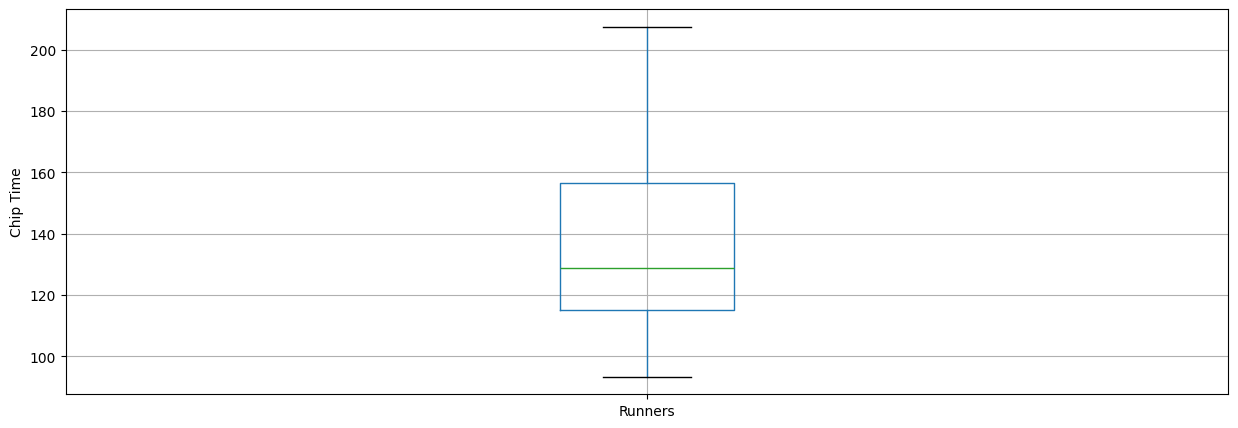

In [30]:
df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

/var/folders/_g/lx6hwl7x1fx5_19phvwcwc340000gn/T/ipykernel_18183/2333182940.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})


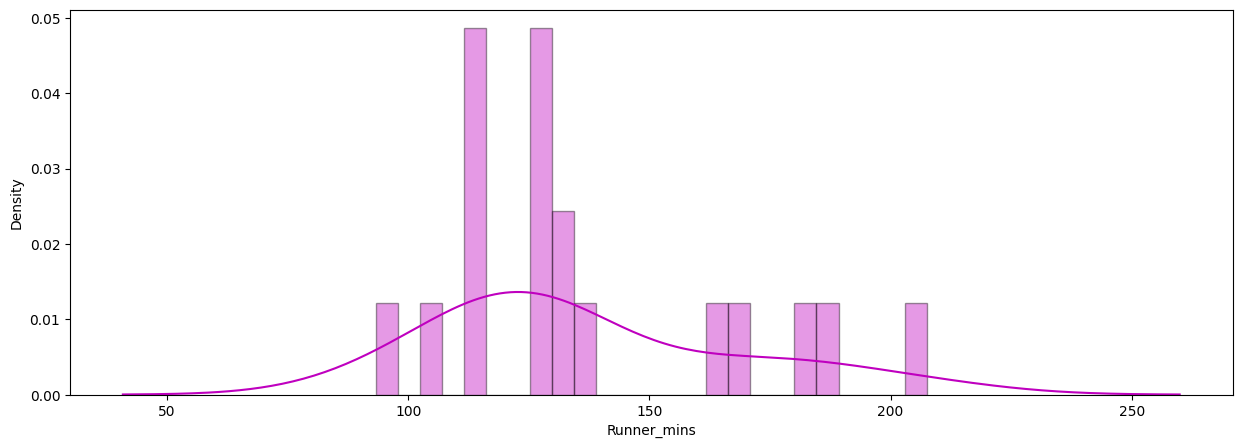

In [31]:
x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

In [32]:
f_fuko = df7.loc[df7[' Gender']==' F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender']==' M']['Runner_mins']
sns.histplot(df7, x=f_fuko)
sns.histplot(df7, x=m_fuko)
plt.legend()

/var/folders/_g/lx6hwl7x1fx5_19phvwcwc340000gn/T/ipykernel_18183/2333017036.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


In [33]:
f_fuko = df7.loc[df7[' Gender']==' F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender']==' M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()


/var/folders/_g/lx6hwl7x1fx5_19phvwcwc340000gn/T/ipykernel_18183/3347935440.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
/var/folders/_g/lx6hwl7x1fx5_19phvwcwc340000gn/T/ipykernel_18183/3347935440.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/

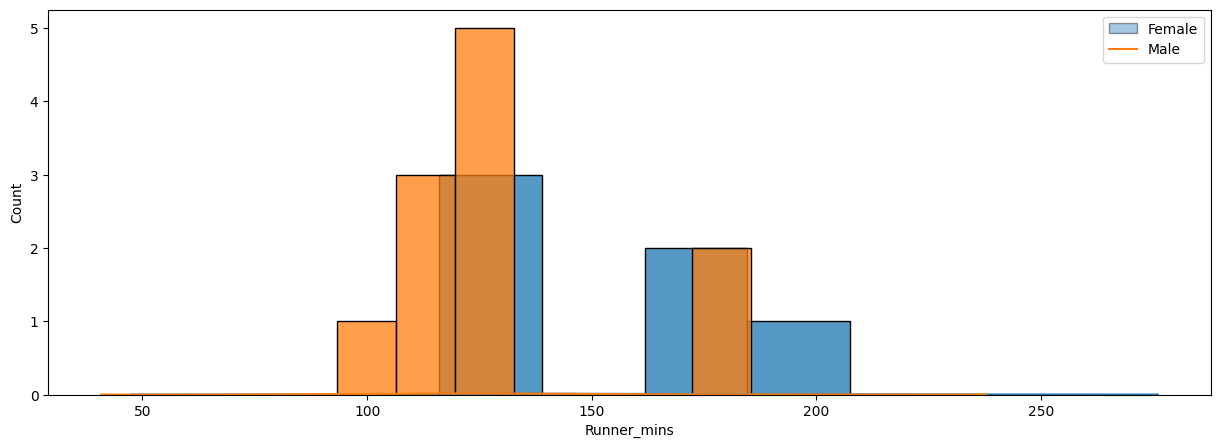

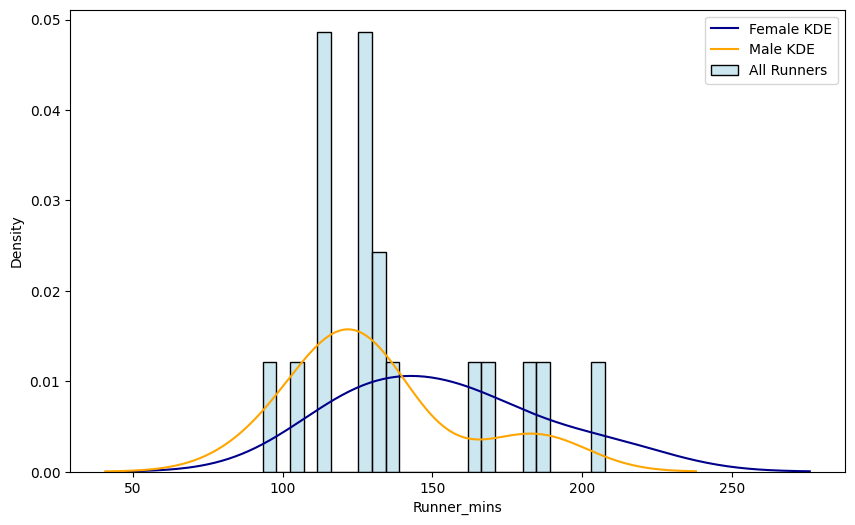

In [34]:
# plt.close('all')  # Optional: clear any previous figures

# Extract data subsets
f_fuko = df7.loc[df7[' Gender'] == ' F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender'] == ' M']['Runner_mins']
all_runners = df7['Runner_mins']

# Create one figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a histogram for all runners with light blue bars (density normalized)
sns.histplot(all_runners, bins=25, stat='density', edgecolor='black', 
             color='lightblue', alpha=0.6, label='All Runners', ax=ax)

# Overlay the female and male KDE curves on the same axis
sns.kdeplot(f_fuko, label='Female KDE', ax=ax, color='darkblue')
sns.kdeplot(m_fuko, label='Male KDE', ax=ax, color='orange')

# Add a legend and display the plot
ax.legend()
plt.show()


In [35]:
g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)

        Runner_mins                                                 \
              count        mean        std         min         25%   
 Gender                                                              
F               6.0  153.494444  32.681316  116.016667  132.150000   
M              11.0  131.121212  28.296109   93.316667  114.058333   
O               1.0  102.933333        NaN  102.933333  102.933333   

                                             
                50%         75%         max  
 Gender                                      
F        150.516667  165.445833  207.466667  
M        127.283333  129.833333  185.416667  
O        102.933333  102.933333  102.933333  


In [36]:
df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Time')
plt.suptitle("")

Text(0.5, 0.98, '')